In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"



1. 서울시 각 구별 cctv 수를 파악하고 인구대비 cctv 비율을 구해 순위 비교
2. 인구대비 cctv의 평균치를 확인하고 cctv가 과하게 부족한 구를 확인
3. 고령자 대비 cctv 비율
4. 외국인 대비 cctv 비율

- 사용 데이터 
- .서울시 지자체별 cctv 현황 data/01. CCTV_in_Seoul.csv
- .서울시 지자체별 인구 현황 data/01.population_in_Seoul.xls


In [83]:
cctv_seoul = pd.read_csv("../Data/01. CCTV_in_Seoul.csv")
cctv_seoul.head()
cctv_seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [84]:
#cctv_seoul df의 컬럼명을 확인
# df.columns
cctv_seoul.columns
cctv_seoul.columns[0]

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

'기관명'

In [85]:
# 기관명 열 이름의 전달력이 떨어져서 컬러명 변경
# 컬럼명 변경: df.rename(columns={바꿀위치: '변경할 이름'})

cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'},inplace=True)
#inplace=True는 즉각적으로 df에 반영하겠다는 뜻! (원본 수정됨)
cctv_seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [86]:
# 서울시 인구현황 데이터 가져오기 - 엑셀파일 읽어오기
# pd.read_excel('파일명')

pop_seoul = pd.read_excel('../Data/01.population_in_Seoul.xls')
pop_seoul.head()

# 원본 데이터가 다중인덱스여서 행을 스킵해야하고 컬럼 중에 필요한 컬럼만 추출할 필요가 있음


,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [87]:
#필요 data 만 가져오기, 자치구, 전체인구수,한국인,외국인,고령자(B,D,G,J,N)
#2행을 skip하고 3행을 header 처리

pop_seoul = pd.read_excel('../Data/01.population_in_Seoul.xls',
                         header = 2, #행 skip (2행을 header로 쓸게요)
                         usecols='B,D,G,J,N') #맨 왼쪽이 A라고 가정

pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [88]:
#컬럼명 변경
#0: 구별
#1:인구수
#2:한국인
#3:외국인
#4:고령자
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
                pop_seoul.columns[1]:'인구수',
                pop_seoul.columns[2]:'한국인',
                pop_seoul.columns[3]:'외국인',
                pop_seoul.columns[4]:'고령자'},inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 각 데이터 파악하기
CCTV_Seoul 데이터프레임 , pop_Seoul 데이터프레임

In [89]:
#cctv_seoul 데이터프레임
cctv_seoul.head()
cctv_seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [90]:
# pop_Seoul 데이터프레임 확인
pop_seoul.head()
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [91]:
cctv_seoul.info()
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구별         25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      26 non-null     object 
 1   인구수     26 non-null     float64
 2   한국인     26 non-null     float64
 3   외국인     26 non-null     float64
 4   고령자     26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [92]:
#기본 통계량 확인
cctv_seoul.describe()
pop_seoul.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1515.320000,764.760000,159.480000,205.200000,385.880000
std,616.774656,415.510257,104.132976,137.877059,182.479981
min,825.000000,238.000000,21.000000,30.000000,81.000000
25%,1010.000000,464.000000,78.000000,103.000000,292.000000
50%,1327.000000,573.000000,142.000000,184.000000,377.000000
75%,1884.000000,1070.000000,218.000000,269.000000,467.000000
max,3238.000000,1843.000000,430.000000,584.000000,932.000000


,인구수,한국인,외국인,고령자
count,2.600000e+01,2.600000e+01,26.000000,2.600000e+01
mean,7.844311e+05,7.636129e+05,20818.153846,1.016506e+05
std,1.924156e+06,1.873421e+06,51598.169516,2.491801e+05
min,1.332400e+05,1.243120e+05,2017.000000,2.076400e+04
25%,3.348055e+05,3.316718e+05,4489.000000,4.831200e+04
50%,4.135115e+05,4.051690e+05,9079.500000,5.439750e+04
75%,4.907855e+05,4.864445e+05,14901.500000,6.431075e+04
max,1.019760e+07,9.926968e+06,270636.000000,1.321458e+06


## CCTV 현황확인

In [93]:
# 소계 컬럼을 활용해서 설치 대수가 많은 구와 적은 구를 확인
# 소계를 기준으로 정렬 후에 head() 이용해서 확인
# 설치대수가 적은 5개 구

cctv_seoul.sort_values(by='소계').head()
#도봉구가 가장 적게 cctv 설치됨

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [94]:
#설치대수가 많은 5개구
cctv_seoul.sort_values(by ='소계',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


#### data 상 최근 3개년 (2014~2016)동안 cctv가 얼마나 증가했는지 확인
- 각 연도별 cctv 대수는 해당년도에 설치한 대수를 의미
- cctv_seoul['최근증가율'] = (2014+2015+2016)/2013 *100

In [95]:
cctv_seoul['최근증가율'] = (cctv_seoul['2016년']+
                           cctv_seoul['2015년']+
                           cctv_seoul['2014년'])/cctv_seoul['2013년도 이전']*100
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [96]:
#최근 증가율이 높은 3개구를 확인
cctv_seoul.sort_values(by='최근증가율',ascending=False).head(3) #오름차순정렬
#도봉구는 설치된 cctv대수는 가장적지만 3개년간 증가율은 높다

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911


In [97]:
#최근 증가율이 높은 3개구를 확인
cctv_seoul.sort_values(by='최근증가율').head(3)
#양천구는 cctv설치수는 2번째로 많은 구이지만 최근 증가율은 낮은편

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2482,1843,142,30,467,34.671731
13,서대문구,1254,844,50,68,292,48.578199
20,용산구,2096,1368,218,112,398,53.216374


## 서울시 인구 데이터 파악
- 사용변수 : pop_Seoul

In [98]:
pop_seoul.head()
pop_seoul.tail()
# 첫행이 합계로 잘못 들어감
# 결측치 행이 존재 26번행

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [99]:
# 첫 행 삭제 필요
# 삭제 명령어 : del => 원본반영 - 열삭제시 주로
# 삭제 함수 : drop()=>원본반영 안됨 - 행삭제시 드롭 사용

pop_seoul.drop([0],inplace=True) #합계 수치를 포함한 행 삭제
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [100]:
#인구데이터에 서울시 25개구가 모두 있는지 확인
len(pop_seoul) 
#26행이 나왔다는 것은 필요없는 데이터가 있다고 추측가능

26

In [101]:
# 각 구별 데이터가 중복되지 않았는지 확인 :구별 컬럼의 원소를 중복제거하고, 출력해서 확인
# unique()
pop_seoul['구별'].unique() 
len(pop_seoul['구별'].unique())
# unique길이를 보니 중복원소는 없는데 말이얌,,

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

26

In [102]:
pop_seoul[pop_seoul['구별'].isnull()] #26행이 결측치 

#어느 구가 끼어있음? 결측치가 있는것 같은데.. isnull()로 체크

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [103]:
pop_seoul.drop(26,inplace=True) #구가 NaN인 행 삭제

In [104]:
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


- 인구데이터를 활용한 가공필드
  - 전체 인구수 대비 외국인 비율 계산: pop_seoul['외국인비율']
  - 전체 인구수 대비 고령자 비율 계산 : pop_Seoul['고령자비율']

In [105]:
pop_seoul['외국인비율']= pop_seoul['외국인']/pop_seoul['인구수'] * 100
pop_seoul['고령자비율']= pop_seoul['고령자']/pop_seoul['인구수'] * 100

In [106]:
pop_seoul.head()
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
25,강동구,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


In [107]:
#인구가 많은 5개구
pop_seoul.sort_values(by='인구수',ascending=False).head()
# 송파구가 인구가 가장 많음

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [108]:
# 외국인 비율이 높은 5개 구
pop_seoul.sort_values(by='외국인비율',ascending=False).head()
# 외국인수가 많은 5개 구
pop_seoul.sort_values(by='외국인',ascending=False).head()
# 영등포, 구로, 금천구는 외국인 많은 사는 지역

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [109]:
# 고령자 비율이 높은 5개 구는?
pop_seoul.sort_values(by='고령자비율',ascending=False).head()
# 고령자수가 많은 5개 구는?
pop_seoul.sort_values(by='고령자',ascending=False).head()
# 강북구가 고령자 비율이 높은 반면에 고령자 절대 수치는 강서구가 높게 나타

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#### 분석 목적 : 각 지자체별 인구수 대비  CCTV 대수의 적정성을 확인
 
- 데이터를 병합해서 확인
- key로 사용할 공통 열이 있어야 함
- 두 데이터프레임에 '구별' 공통 열이 존재 : 키로 사용
- 두 데이터프레임의  행은 25개 구로 동일하게 data가 있으니 how는 어떤걸 사용해도 됨   

In [110]:
data_result = pd.merge(cctv_seoul, pop_seoul, on= '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [111]:
#병합 후 사용하지 않을 컬럼은 삭제
#열 삭제시 del 이 가장 일반적 - 원본반영되므로 두번 실행하면 안됨
#cctv 데이터의 2013-2016필드 삭제
#소계랑 cctv증가율만 필요할것 같아용~~
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#### df의 행을 대표하는 컬럼이 있으면 해당 컬럼을 인덱스로 설정하면 시각화 등의 작업에 효율적
- 구별 컬럼을 인덱스로 설정(df.set_index(컬럼명, inplace=True))
- inplace=True 원본반영 여부

In [112]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#### CCTV와 인구현황에 대한  시각화 작업

In [113]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 7 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [114]:
# 사용 data 
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='구별'>

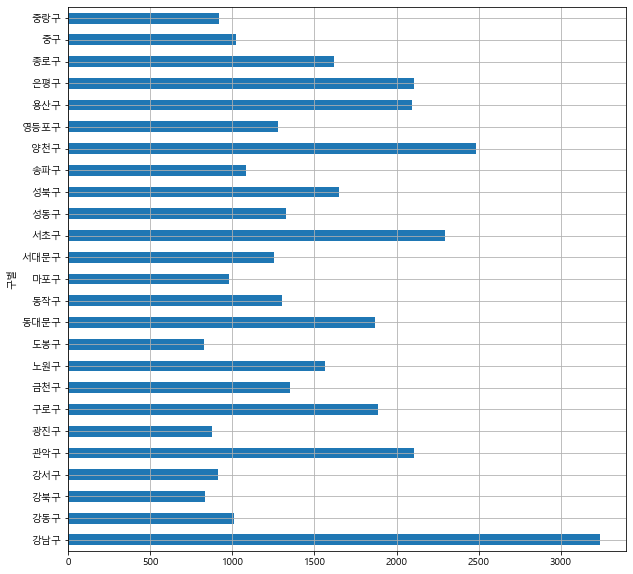

In [115]:
# 각 구별로 cctv 대수가 얼마나 차이가 나는지 시각화 통해서 확인
plt.figure(figsize=(10,10))
data_result['소계'].plot(kind='barh', grid=True)
plt.show()

<Figure size 720x720 with 0 Axes>

구별
도봉구      825
강북구      831
광진구      878
강서구      911
중랑구      916
마포구      980
강동구     1010
중구      1023
송파구     1081
서대문구    1254
영등포구    1277
동작구     1302
성동구     1327
금천구     1348
노원구     1566
종로구     1619
성북구     1651
동대문구    1870
구로구     1884
용산구     2096
은평구     2108
관악구     2109
서초구     2297
양천구     2482
강남구     3238
Name: 소계, dtype: int64

<BarContainer object of 25 artists>

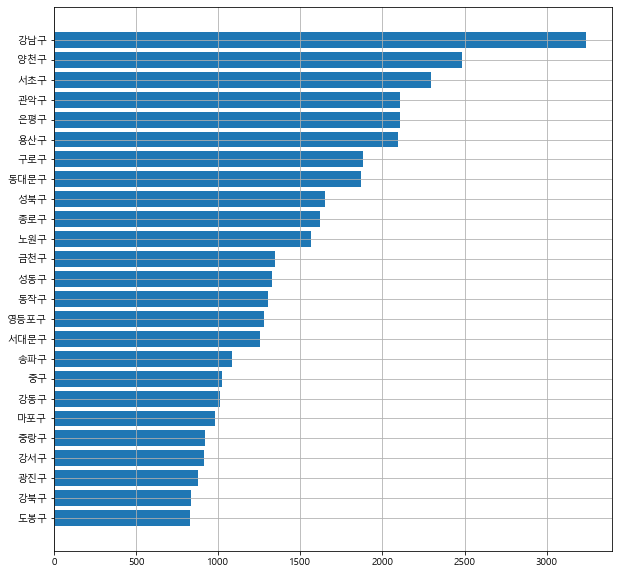

In [116]:
# 각 구별로 cctv 대수가 얼마나 차이가 나는지 시각화 통해서 확인 2
plt.figure(figsize=(10,10))
sort_cctv = data_result['소계'].sort_values()
sort_cctv
plt.barh(sort_cctv.index, sort_cctv)
plt.grid()
plt.show()

### 다수의 데이터의 상관관계를 비교
- 인구와 관련된 각 필드와 CCTV 소계와의 상관관계를 파악해서 그래프로 표현

- 상관관계  : 두 변수의 관련성을 확인하는 방법
    - 계산 결과의 절대값이 클수록 두 데이터는 관계가 있다고 봄

    - 상관관계 계산 함수
        - numpy 패키지의 corrcoef(데이터 값1, 데이터 값2)
        
        - 절대값 기준
            - 0.1이하면 무시
            - 0.3이하면 약한 상관 관계
            - 0.7을 기준으로 강한 상관관계가 있다 봄


In [152]:
#상관관계를 파악할 컬럼

#전체 cctv 대수와 전체 인구수
#전체 cctv 대수와 고령자 비율
#전체 cctv 대수와 외국인 비율

np.corrcoef(data_result['소계'],data_result['인구수'])
np.corrcoef(data_result['소계'],data_result['고령자비율'])
np.corrcoef(data_result['소계'],data_result['외국인비율'])
#절대값이 0.1이하인것들은 무시

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

array([[ 1.        , -0.25866272],
       [-0.25866272,  1.        ]])

array([[ 1.        , -0.05230165],
       [-0.05230165,  1.        ]])

1. cctv 는 강남구가 가장 많이 설치되어 있음

2. 인구수, 외국인비율, 고령자비율과 cctv의 상관관계를 확인했을때
    - 인구수 vs cctv
    - 고령자 비율 vs cctv 가 약한 상관관계를 보임
    
3. 인구수 vs cctv 의 그래프 그리기

4. 각 구별로 인구수 대비 cctv 설치비율을 확인해서
    - 인구수와 설치비율 데이터 관계 확인
- 가공필드 작성

#####  인구수 대비 cctv가 많이 설치되어 있는 지역 찾기


In [118]:
data_result['cctv비율'] = data_result['소계']/data_result['인구수']*100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


<AxesSubplot:ylabel='구별'>

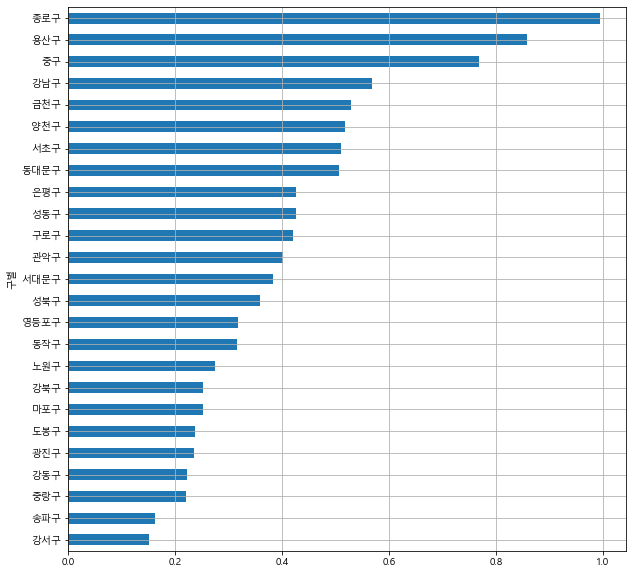

In [119]:
#인구 대비 cctv 설치 수 ('cctv 비율')가 높은 지역 순으로 그래프
data_result['cctv비율'].sort_values().plot(kind = 'barh',
                                         grid = True, 
                                         figsize=(10,10))

- 인구 대비 cctv 비율은 용산 종로 중구가 월등히 높다, 주거지역이 적고 유동인구가 많은 대표지역

In [120]:
# 인구수와 cctv 대수를 비교하는 scatter 그래프 그리기

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

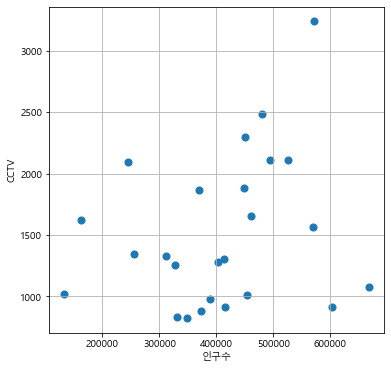

In [121]:
#마커 크기 50으로 설정
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.grid()

In [122]:
#인구수와 CCTV수를 이용해 최소오차 직선식 계수 구하기
# 1차 직선을 그리기 위한 방정식 계수 찾기
# 인구수(x) 570,500,53233일때 CCTV대수(y) 3238,1010의 두 점이 있을때 직선을 그리기 위한
# 1차 함수의 계수를 계산해주는 함수 - 기울기와 절편을 찾아주는 함수
# polyfit(x,y,n)
# y에 대한 x의 그래프에서 오차가 가장 적은 
# n차 방정식 계수 반환
# poly1d(방정식계수) - 계수를 이용해서 방정식함수로 생성


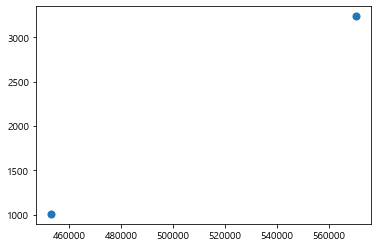

In [123]:
x = [570500,453233]
y = [3238,1010]

plt.scatter(x,y,s =50)

In [124]:
fp1 = np.polyfit(x,y,1)
fp1
f1 = np.poly1d(fp1) #전달된 계수를 함수로 생성

array([ 1.89993775e-02, -7.60114486e+03])

In [125]:
fx = np.linspace(100000,700000,100) #직선그래프를 그리기위한 x data

In [126]:
fy = f1(fx)
fy

array([-5701.20710856, -5586.05936621, -5470.91162385, -5355.76388149,
       -5240.61613913, -5125.46839678, -5010.32065442, -4895.17291206,
       -4780.0251697 , -4664.87742735, -4549.72968499, -4434.58194263,
       -4319.43420027, -4204.28645792, -4089.13871556, -3973.9909732 ,
       -3858.84323085, -3743.69548849, -3628.54774613, -3513.40000377,
       -3398.25226142, -3283.10451906, -3167.9567767 , -3052.80903434,
       -2937.66129199, -2822.51354963, -2707.36580727, -2592.21806491,
       -2477.07032256, -2361.9225802 , -2246.77483784, -2131.62709548,
       -2016.47935313, -1901.33161077, -1786.18386841, -1671.03612605,
       -1555.8883837 , -1440.74064134, -1325.59289898, -1210.44515662,
       -1095.29741427,  -980.14967191,  -865.00192955,  -749.85418719,
        -634.70644484,  -519.55870248,  -404.41096012,  -289.26321776,
        -174.11547541,   -58.96773305,    56.18000931,   171.32775167,
         286.47549402,   401.62323638,   516.77097874,   631.9187211 ,
      

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

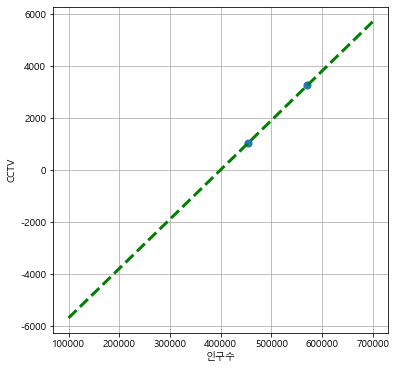

In [127]:
x = [570500,453233]
y = [3238,1010]

plt.figure(figsize=(6,6))
plt.scatter(x,y,s=50)
plt.plot(fx,fy,ls='dashed',lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

In [128]:
#수집 데이터 활용해서 대표 직선 방정식 구하기

fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1
f1 = np.poly1d(fp1) #전달된 계수를 함수로 생성

array([1.15151285e-03, 1.04561312e+03])

In [129]:
fx = np.linspace(100000,700000,100) #직선그래프를 그리기위한 x data
#fx
fy = f1(fx)

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

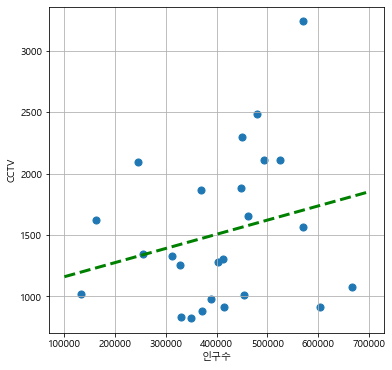

In [130]:
#최소 오차직선 그래프 추가
#마커 크기 50으로 설정
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'], s=50)
plt.plot(fx,fy,ls='dashed',lw=3,color='g')

plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.grid()

- 위 그래프의 직선의 의미
- 인구수가 400000일때 적당한 cctv 대수는 1500대 정도라는 것을 의미함

- 선근처에 분포하고 있으면 적당한 대수를 갖고 있고
- 선에서 멀어질 수록 cctv 대수가 너무 많거나 너무 적은 걸 의미한다.- 위 그래프의 직선의 의미
- 인구수가 400000일때 적당한 cctv 대수는 1500대 정도라는 것을 의미함

- 선근처에 분포하고 있으면 적당한 대수를 갖고 있고
- 선에서 멀어질 수록 cctv 대수가 너무 많거나 너무 적은 걸 의미한다.


### 각 구별 적절한 cctv 수를 계산해 오차가 많은 지역 표시하기

In [131]:
# 각 구별로 적절한 cctv 수 계산

In [132]:
f1(data_result['인구수'])

array([1702.55119857, 1567.51674158, 1425.83344942, 1740.86433401,
       1650.75039317, 1474.16474662, 1561.34578424, 1339.34331951,
       1701.26611024, 1447.08346749, 1471.09251034, 1520.63519906,
       1494.29894874, 1422.34551701, 1564.15086953, 1404.014584  ,
       1576.7599352 , 1814.22836898, 1598.31395267, 1509.65552407,
       1326.81601125, 1614.90725279, 1233.10244125, 1199.04069124,
       1522.91864903])

In [133]:
data_result['소계'] - f1(data_result['인구수'])

구별
강남구     1535.448801
강동구     -557.516742
강북구     -594.833449
강서구     -829.864334
관악구      458.249607
광진구     -596.164747
구로구      322.654216
금천구        8.656680
노원구     -135.266110
도봉구     -622.083467
동대문구     398.907490
동작구     -218.635199
마포구     -514.298949
서대문구    -168.345517
서초구      732.849130
성동구      -77.014584
성북구       74.240065
송파구     -733.228369
양천구      883.686047
영등포구    -232.655524
용산구      769.183989
은평구      493.092747
종로구      385.897559
중구      -176.040691
중랑구     -606.918649
Name: 소계, dtype: float64

In [135]:
#오차를 절대값으로 게산한 후 오차열을 기준으로 내림차순 정렬
#절대값 계산; np.abs(data)
#cctv 부족 또는 많은 상태를 표현하는 ['오차'] 필드 생성

data_result['오차'] = np.abs(data_result['소계']-f1(data_result['인구수']))
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,557.516742
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,594.833449
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,458.249607


In [144]:
df_sort = data_result.sort_values(by='오차',ascending=False)
df_sort.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107,883.686047
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302,769.183989
송파구,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.161952,733.228369
서초구,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.510093,732.849130
도봉구,825,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630,622.083467
중랑구,916,79.960707,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,0.220988,606.918649
광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917,596.164747


### 오차가 큰 상위 10개 도시 표시하기
- 그래프에 글자 출력 : plt.text(x,y,text,fontsize)
    - 점보다약간 오른쪽 아래에 출력되도록 좌표를 변경한 후 실행

- 10개를 출력 for 문을 이용


<Figure size 432x432 with 0 Axes>

Text(581910.0, 3173.24, '강남구')

Text(489577.56, 2432.36, '양천구')

Text(615847.4400000001, 892.78, '강서구')

Text(249087.06, 2054.08, '용산구')

Text(680832.66, 1059.3799999999999, '송파구')

Text(459316.2, 2251.06, '서초구')

Text(355618.92, 808.5, '도봉구')

Text(422793.06, 897.68, '중랑구')

Text(379607.28, 860.4399999999999, '광진구')

Text(336795.84, 814.38, '강북구')

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

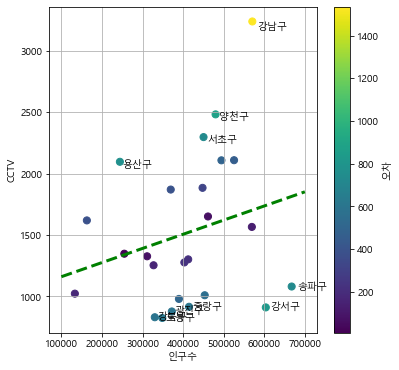

In [151]:
#scatter 색상을 오차 데이터에 따라 다르게 표현하기

#최소 오차직선 그래프 추가
#마커 크기 50으로 설정
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'], s=50,c=data_result['오차'])
plt.plot(fx,fy,ls='dashed',lw=3,color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02,
            df_sort['소계'][n]*0.98,
            df_sort.index[n],
            fontsize = 10)

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar(label='오차')

plt.grid()